In [5]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
from statistics import mean
import math
import json

In [6]:
print("hello world")

hello world


In [7]:
fuzz.token_set_ratio("Abbbc", "abc")

75

In [3]:
file_name = "seen_e2e_kgdial.csv"
df_seen_e2e_kgdial = pd.read_csv(file_name)
df_seen_e2e_kgdial = df_seen_e2e_kgdial.replace({np.nan: None})
df_seen_e2e_kgdial

,Unnamed: 0,topic,last_sentence,checked_sentence,eval_label,generated_sentence
0,0,Blue,Blue,Blue is one of the three primary colours of pi...,Blue is my favorite primary color.,blue is one of the three primary colors .
1,1,Cinematography,"Cinematography\nHi buddy, What you think about...","Cinematography (also called ""Direction of Phot...","Cinematography,is a type of motion picture , c...",i love cinematography ! it ' s a science of mo...
2,2,Genius,Genius,A genius is a person who displays exceptional ...,a genius is a person who displays exceptional ...,"i am a genius , i am a genius and i have a lot..."
3,3,Husky,Husky\nI just got a husky puppy,Husky is a general name for a sled-type of dog...,It sounds cute! Huskies are known amongst sled...,i love huskies ! they are a sled dog that is u...
4,4,Forgetting,Forgetting,Forgetting or disremembering is the apparent l...,Forgetting is the process of losing informatio...,i am not sure how much it is . i know memory i...
...,...,...,...,...,...,...
4027,4027,None,None,None,None,None
4028,4028,None,None,None,None,None
4029,4029,None,None,None,None,None
4030,4030,None,None,None,None,None


In [4]:
l_ratio_checked_label = []
l_ratio_checked_generated = []
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"]:
        l_ratio_checked_label.append(None)
        l_ratio_checked_generated.append(None)
        continue
    checked_sentence = row["checked_sentence"]
    eval_label = row["eval_label"]
    generated_sentence = row["generated_sentence"]
    l_ratio_checked_label.append(fuzz.token_set_ratio(checked_sentence, eval_label))
    l_ratio_checked_generated.append(fuzz.token_set_ratio(checked_sentence, generated_sentence))
df_seen_e2e_kgdial["ratio_checked_label"] = l_ratio_checked_label
df_seen_e2e_kgdial["ratio_checked_generated"] = l_ratio_checked_generated
df_seen_e2e_kgdial

,Unnamed: 0,topic,last_sentence,checked_sentence,eval_label,generated_sentence,ratio_checked_label,ratio_checked_generated
0,0,Blue,Blue,Blue is one of the three primary colours of pi...,Blue is my favorite primary color.,blue is one of the three primary colors .,62.0,90.0
1,1,Cinematography,"Cinematography\nHi buddy, What you think about...","Cinematography (also called ""Direction of Phot...","Cinematography,is a type of motion picture , c...",i love cinematography ! it ' s a science of mo...,91.0,80.0
2,2,Genius,Genius,A genius is a person who displays exceptional ...,a genius is a person who displays exceptional ...,"i am a genius , i am a genius and i have a lot...",100.0,73.0
3,3,Husky,Husky\nI just got a husky puppy,Husky is a general name for a sled-type of dog...,It sounds cute! Huskies are known amongst sled...,i love huskies ! they are a sled dog that is u...,59.0,63.0
4,4,Forgetting,Forgetting,Forgetting or disremembering is the apparent l...,Forgetting is the process of losing informatio...,i am not sure how much it is . i know memory i...,88.0,45.0
...,...,...,...,...,...,...,...,...
4027,4027,None,None,None,None,None,NaN,NaN
4028,4028,None,None,None,None,None,NaN,NaN
4029,4029,None,None,None,None,None,NaN,NaN
4030,4030,None,None,None,None,None,NaN,NaN


In [5]:
dic_topic = {}
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"] or row["topic"] == "no_passages_used":
        continue
    if row["topic"] not in dic_topic:
        dic_topic[row["topic"]] = 1
    else:
        dic_topic[row["topic"]] +=1
l_count_topic = {}
for key,val in dic_topic.items():
    if val not in l_count_topic:
        l_count_topic[val] = 1
    else:
        l_count_topic[val] += 1
if file_name == "train_e2e_kgdial.csv":
    with open('training_dic_topic.json', 'w') as fp:
        json.dump(dic_topic, fp)
    fp.close()
else:
    fp = open('training_dic_topic.json',)
    dic_topic = json.load(fp)
    fp.close()
# l_count_topic
{k: v for k, v in sorted(dic_topic.items(), key=lambda item: item[1], reverse=True)}

{'Pizza': 919,
 'Dog': 603,
 'Blue': 540,
 'Veganism': 493,
 'Cat': 452,
 'Vegetarianism': 355,
 'Reading (process)': 354,
 'Swimming': 339,
 'New York City': 333,
 "McDonald's": 319,
 'Red hair': 294,
 'Hiking': 291,
 'Cooking': 283,
 'Night owl (person)': 267,
 'Parenting': 250,
 'Divorce': 247,
 'Yoga': 245,
 'Surfing': 243,
 'Chocolate': 240,
 'Steak': 236,
 'Armadillo': 236,
 'Golden Retriever': 225,
 'Heavy metal music': 222,
 'Florida': 222,
 'Sushi': 221,
 'Purple': 214,
 'Italian cuisine': 207,
 'Taco': 207,
 'Game of Thrones': 206,
 'Beach': 203,
 'The Beatles': 196,
 'Piano': 194,
 'Animal shelter': 194,
 'Gardening': 183,
 'Hamburger': 181,
 'Association football': 179,
 'Guitar': 179,
 'Ice cream': 172,
 'Drawing': 172,
 'Yellow': 172,
 'Country music': 171,
 'Ketogenic diet': 169,
 'Skateboarding': 167,
 'Honda Civic': 166,
 'Husky': 160,
 'Rose': 157,
 'Basketball': 155,
 'Tattoo': 151,
 'Violin': 151,
 'Only child': 150,
 'Coffee': 150,
 'Tennis': 144,
 'Chevrolet Corve

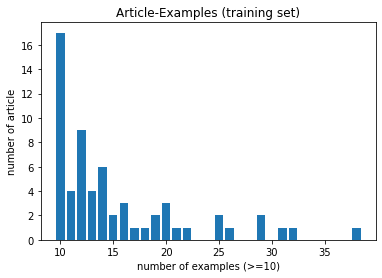

1184


In [6]:
plt_x = []
plt_y = []
count = 0
for key,val in l_count_topic.items():
    if key < 10:
        count += val
        continue
    plt_x.append(key)
    plt_y.append(val)
plt.bar(plt_x,plt_y)
plt.title("Article-Examples (training set)");
plt.xlabel("number of examples (>=10)");
plt.ylabel("number of article");
plt.show()
print(count)

In [7]:
# plt_x = [10,20,30,40,50,60,70,80,90,100]
checked_eval = {10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0,90:0,100:0}
checked_gen = {10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0,90:0,100:0}
sum_checked_eval = 0
sum_checked_gen = 0
count = 0 
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"] or row["topic"] == "no_passages_used":
        continue
    eval_value = math.ceil(row["ratio_checked_label"]/10)*10
    if eval_value == 0:
        eval_value = 10
    gen_value = math.ceil(row["ratio_checked_generated"]/10)*10
    if gen_value == 0:
        gen_value = 10
    checked_eval[eval_value] += 1
    checked_gen[gen_value] += 1
    sum_checked_eval += row["ratio_checked_label"]
    sum_checked_gen += row["ratio_checked_generated"]
    count += 1
print(count)
print(sum_checked_eval/count)
print(checked_eval)
print(sum_checked_gen/count)
print(checked_gen)

3649
70.4579336804604
{10: 0, 20: 0, 30: 10, 40: 45, 50: 323, 60: 741, 70: 777, 80: 695, 90: 572, 100: 486}
51.69799945190463
{10: 3, 20: 7, 30: 165, 40: 893, 50: 1247, 60: 449, 70: 243, 80: 195, 90: 238, 100: 209}


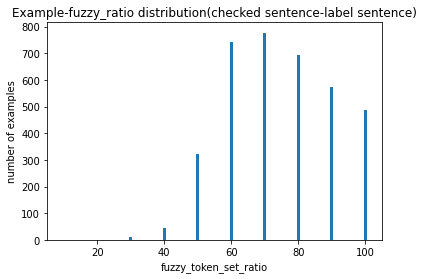

In [8]:
plt_x = []
plt_y = []
for key,val in checked_eval.items():
    plt_x.append(key)
    plt_y.append(val)
plt.bar(plt_x,plt_y)
plt.title("Example-fuzzy_ratio distribution(checked sentence-label sentence)");
plt.xlabel("fuzzy_token_set_ratio");
plt.ylabel("number of examples");
plt.show()

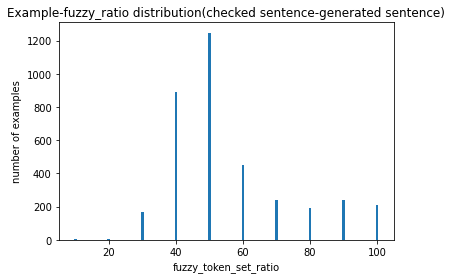

In [9]:
plt_x = []
plt_y = []
for key,val in checked_gen.items():
    plt_x.append(key)
    plt_y.append(val)
plt.bar(plt_x,plt_y)
plt.title("Example-fuzzy_ratio distribution(checked sentence-generated sentence)");
plt.xlabel("fuzzy_token_set_ratio");
plt.ylabel("number of examples");
plt.show()

In [10]:
dic_topic_checked_eval_ratio = {}
dic_topic_checked_gen_ratio = {}
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"] or row["topic"] == "no_passages_used":
        continue
    if row["topic"] not in dic_topic_checked_eval_ratio:
        dic_topic_checked_eval_ratio[row["topic"]] = [row["ratio_checked_label"]]
    else:
        dic_topic_checked_eval_ratio[row["topic"]].append(row["ratio_checked_label"])
    if row["topic"] not in dic_topic_checked_gen_ratio:
        dic_topic_checked_gen_ratio[row["topic"]] = [row["ratio_checked_generated"]]
    else:
        dic_topic_checked_gen_ratio[row["topic"]].append(row["ratio_checked_generated"])
for key,val in dic_topic_checked_eval_ratio.items():
    dic_topic_checked_eval_ratio[key] = mean(val)
for key,val in dic_topic_checked_gen_ratio.items():
    dic_topic_checked_gen_ratio[key] = mean(val)
print(dic_topic_checked_eval_ratio)
print(dic_topic_checked_gen_ratio)

{'Blue': 68.84615384615384, 'Cinematography': 76.33333333333333, 'Genius': 97.25, 'Husky': 57.666666666666664, 'Forgetting': 83.33333333333333, 'Budweiser': 74.375, 'Coors Brewing Company': 96.5, 'Italian cuisine': 70.15384615384616, 'Purple': 71.2, 'Orc': 55.333333333333336, 'The Rolling Stones': 69.3, 'New York City': 63.5, 'Football': 54.0, 'Coco Chanel': 70.44444444444444, 'Basenji': 96.0, 'Stephen Hawking': 67.0, 'Science fiction': 84.0, 'Iguana': 67.8125, 'Cake': 87.0, 'Dog': 62.36363636363637, 'Ballet': 69.77777777777777, 'Cruise ship': 66.5, 'National Football League': 57.25, 'Nintendo': 74.2, 'Canada': 83.0, 'Peyton Manning': 75.0, 'Narcissus (plant)': 63.25, 'Giant panda': 77.75, 'Autograph': 68.75, 'Basketball': 64.0, 'Star Trek': 86.2, 'Truck': 73.0, 'Drum kit': 68.5, 'Netflix': 67.58333333333333, 'Depression (mood)': 63.9, 'Bakery': 100.0, 'Slacker': 77.33333333333333, 'Reality television': 62.2, 'Drawing': 63.0, 'Swimming': 73.48275862068965, 'Divorce': 70.75, 'Taco': 68.

In [11]:
dic_example_topic_checked_eval_ratio = {}
dic_example_topic_checked_gen_ratio = {}
for key,val in dic_topic_checked_eval_ratio.items():
    if key not in dic_topic:
        dic_topic[key] = 0
    if dic_topic[key] not in dic_example_topic_checked_eval_ratio:
        dic_example_topic_checked_eval_ratio[dic_topic[key]] = [val]
    else:
        dic_example_topic_checked_eval_ratio[dic_topic[key]].append(val)

for key,val in dic_topic_checked_gen_ratio.items():
    if key not in dic_topic:
        dic_topic[key] = 0
    if dic_topic[key] not in dic_example_topic_checked_gen_ratio:
        dic_example_topic_checked_gen_ratio[dic_topic[key]] = [val]
    else:
        dic_example_topic_checked_gen_ratio[dic_topic[key]].append(val)

for key,val in dic_example_topic_checked_eval_ratio.items():
    dic_example_topic_checked_eval_ratio[key] = mean(val)
    
for key,val in dic_example_topic_checked_gen_ratio.items():
    dic_example_topic_checked_gen_ratio[key] = mean(val)
    
print(dic_example_topic_checked_eval_ratio)
print(dic_example_topic_checked_gen_ratio)

{540: 68.84615384615384, 83: 72.16666666666666, 38: 74.125, 160: 57.666666666666664, 11: 70.53125, 49: 69.90166666666667, 48: 73.0021645021645, 207: 69.26442307692308, 214: 71.2, 34: 64.02916666666667, 140: 66.55, 333: 63.5, 47: 70.2, 39: 78.81763668430335, 0: 69.79957805907173, 87: 84.0, 79: 70.45535714285714, 60: 76.79166666666667, 603: 62.36363636363637, 80: 68.87037037037037, 76: 76.02261904761905, 6: 70.79354838709678, 36: 63.94285714285714, 37: 66.11444444444444, 92: 75.275, 5: 68.52692307692308, 155: 64.0, 44: 73.9095238095238, 17: 71.09375, 106: 69.93452380952381, 81: 69.475, 42: 69.5, 41: 64.82738095238095, 18: 71.50333333333333, 172: 73.13333333333334, 339: 73.48275862068965, 247: 70.75, 121: 85.83333333333333, 122: 75.744708994709, 134: 79.25, 116: 74.875, 31: 66.11666666666666, 61: 63.76428571428571, 919: 68.39473684210526, 30: 77.03333333333333, 115: 60.5, 86: 71.76041666666667, 7: 69.63636363636364, 4: 67.09032258064516, 1: 67.64924242424243, 2: 65.67307692307692, 114: 58

[540, 83, 38, 160, 11, 49, 48, 207, 214, 34, 140, 333, 47, 39, 0, 87, 79, 60, 603, 80, 76, 6, 36, 37, 92, 5, 155, 44, 17, 106, 81, 42, 41, 18, 172, 339, 247, 121, 122, 134, 116, 31, 61, 919, 30, 115, 86, 7, 4, 1, 2, 114, 14, 104, 13, 84, 35, 8, 194, 3, 40, 9, 91, 22, 119, 29, 66, 23, 19, 452, 58, 73, 26, 28, 85, 50, 203, 51, 21, 132, 89, 56, 65, 117, 64, 90, 43, 12, 71, 143, 45, 107, 96, 77, 63, 46, 15, 110, 105, 354, 52, 283, 24, 167, 68, 236, 221, 291, 245, 59, 20, 222, 27, 131, 151, 75, 109, 240, 243, 319, 53, 33, 55, 99, 171, 355, 103, 206, 183, 142, 32, 267, 57, 62, 10, 493, 16, 157, 25, 150, 144, 196, 88, 95, 78, 179, 250, 98, 72, 70, 111, 74, 97, 166, 126, 94, 125, 124, 69, 294, 225, 67, 128, 54]
[68.84615384615384, 72.16666666666666, 74.125, 57.666666666666664, 70.53125, 69.90166666666667, 73.0021645021645, 69.26442307692308, 71.2, 64.02916666666667, 66.55, 63.5, 70.2, 78.81763668430335, 69.79957805907173, 84.0, 70.45535714285714, 76.79166666666667, 62.36363636363637, 68.870370

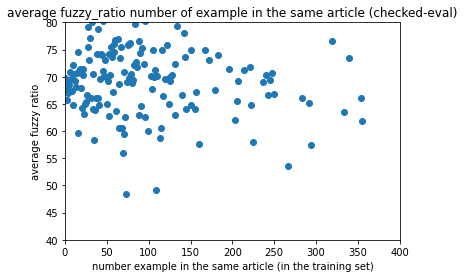

In [12]:
plt_x = []
plt_y = []
for key,val in dic_example_topic_checked_eval_ratio.items():
    plt_x.append(key)
    plt_y.append(val)
print(plt_x)
print(plt_y)
plt.scatter(plt_x,plt_y)
plt.ylim(40, 80)
plt.xlim(0, 400)
plt.title("average fuzzy_ratio number of example in the same article (checked-eval)");
plt.xlabel("number example in the same article (in the training set)");
plt.ylabel("average fuzzy ratio");
plt.show()

[540, 83, 38, 160, 11, 49, 48, 207, 214, 34, 140, 333, 47, 39, 0, 87, 79, 60, 603, 80, 76, 6, 36, 37, 92, 5, 155, 44, 17, 106, 81, 42, 41, 18, 172, 339, 247, 121, 122, 134, 116, 31, 61, 919, 30, 115, 86, 7, 4, 1, 2, 114, 14, 104, 13, 84, 35, 8, 194, 3, 40, 9, 91, 22, 119, 29, 66, 23, 19, 452, 58, 73, 26, 28, 85, 50, 203, 51, 21, 132, 89, 56, 65, 117, 64, 90, 43, 12, 71, 143, 45, 107, 96, 77, 63, 46, 15, 110, 105, 354, 52, 283, 24, 167, 68, 236, 221, 291, 245, 59, 20, 222, 27, 131, 151, 75, 109, 240, 243, 319, 53, 33, 55, 99, 171, 355, 103, 206, 183, 142, 32, 267, 57, 62, 10, 493, 16, 157, 25, 150, 144, 196, 88, 95, 78, 179, 250, 98, 72, 70, 111, 74, 97, 166, 126, 94, 125, 124, 69, 294, 225, 67, 128, 54]
[66.5, 70.91666666666666, 58.9375, 48.833333333333336, 51.677083333333336, 49.88055555555555, 49.692640692640694, 49.27403846153846, 75.7, 53.1875, 51.5, 68.85, 48.94285714285714, 54.361552028218696, 42.848101265822784, 46.0, 67.11904761904762, 55.19444444444444, 53.40909090909091, 59.8

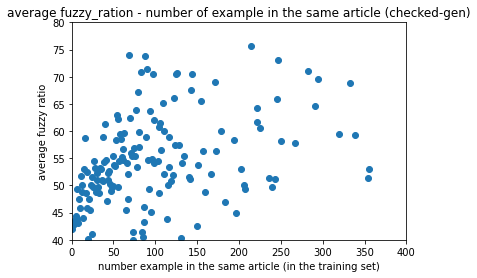

In [13]:
plt_x = []
plt_y = []
for key,val in dic_example_topic_checked_gen_ratio.items():
    plt_x.append(key)
    plt_y.append(val)
print(plt_x)
print(plt_y)
plt.ylim(40, 80)
plt.xlim(0, 400)
plt.scatter(plt_x,plt_y)
plt.title("average fuzzy_ration - number of example in the same article (checked-gen)");
plt.xlabel("number example in the same article (in the training set)");
plt.ylabel("average fuzzy ratio");
plt.show()